<a href="https://colab.research.google.com/github/Azhar-ali7/Netflix-Movies-TVshow-unsupervised/blob/main/Netflix_Movies_and_tv_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised ML: Netflix Movies and TV Shows Clustering

##Problem Description

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


###In this project, you are required to do 

*   Exploratory Data Analysis
*   Understanding what type content is available in different countries
*   Is Netflix has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features







###Dataset Description



1.   show_id : Unique ID for every Movie / Tv Show

2.   type : Identifier - A Movie or TV Show

3.   title : Title of the Movie / Tv Show

4.   director : Director of the Movie

5.   cast : Actors involved in the movie / show

6.   country : Country where the movie / show was produced

7.   date_added : Date it was added on Netflix

8.   release_year : Actual Releaseyear of the movie / show

9.   rating : TV Rating of the movie / show

10.  duration : Total Duration - in minutes or number of seasons

11.  listed_in : Genere

12.  description: The Summary description

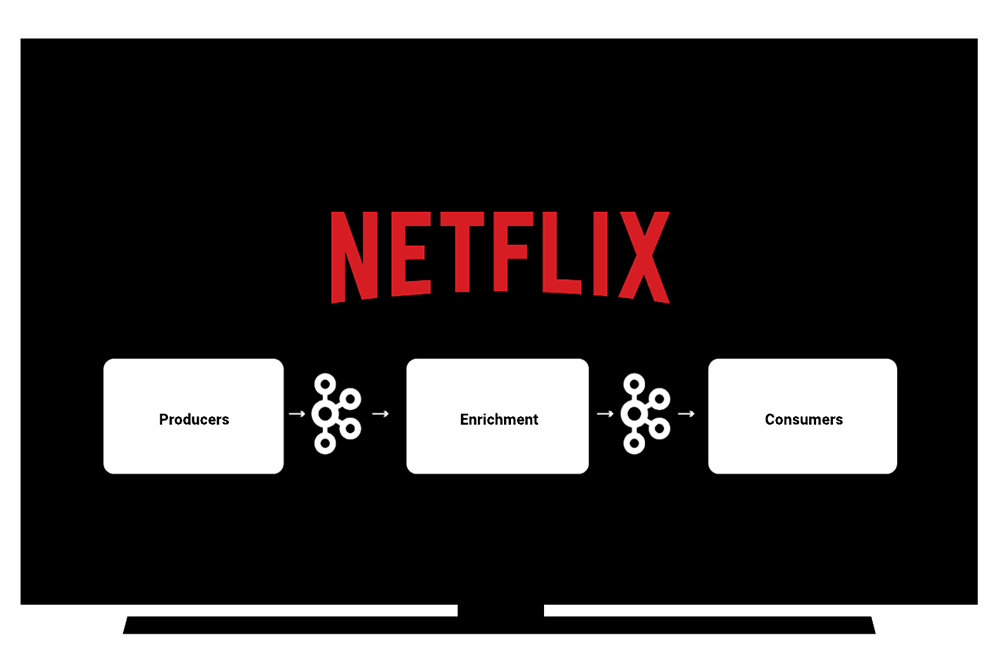

##Importing Libraries

In [153]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [154]:
# Loading a url
url = 'https://raw.githubusercontent.com/Azhar-ali7/Netflix-Movies-TVshow-unsupervised/main/NETFLIX%20MOVIES%20AND%20TV%20SHOWS%20CLUSTERING.csv'

# Reading csv file
df = pd.read_csv(url, encoding = 'latin-1')

##Understanding the data

In [155]:
netflix_df = df.copy()

In [156]:
# Top five rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [157]:
# Last five rows
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [158]:
# Shape of dataset
netflix_df.shape

(7787, 12)

In [159]:
# No. of rows in Dataset are
print('No. of rows in Dataset are', netflix_df.shape[0])

# No. of columns in Dataset are
print('No. of columns in Dataset are', netflix_df.shape[1])

No. of rows in Dataset are 7787
No. of columns in Dataset are 12


Data type of each column in the dataset

In [160]:
# Data type
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [161]:
# Checking for unique values in each columm of the dataset
for i in netflix_df.columns:
  print('Total no of unique in', i, 'are -->', len(netflix_df[i].unique()), '\n')

Total no of unique in show_id are --> 7787 

Total no of unique in type are --> 2 

Total no of unique in title are --> 7787 

Total no of unique in director are --> 4050 

Total no of unique in cast are --> 6832 

Total no of unique in country are --> 682 

Total no of unique in date_added are --> 1566 

Total no of unique in release_year are --> 73 

Total no of unique in rating are --> 15 

Total no of unique in duration are --> 216 

Total no of unique in listed_in are --> 492 

Total no of unique in description are --> 7769 



In [162]:
# Name of columns in the dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [163]:
# Description of the dataset
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [164]:
# Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [165]:
# Total missing values in each column
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Plotting heatmap of different columns to check the missing values


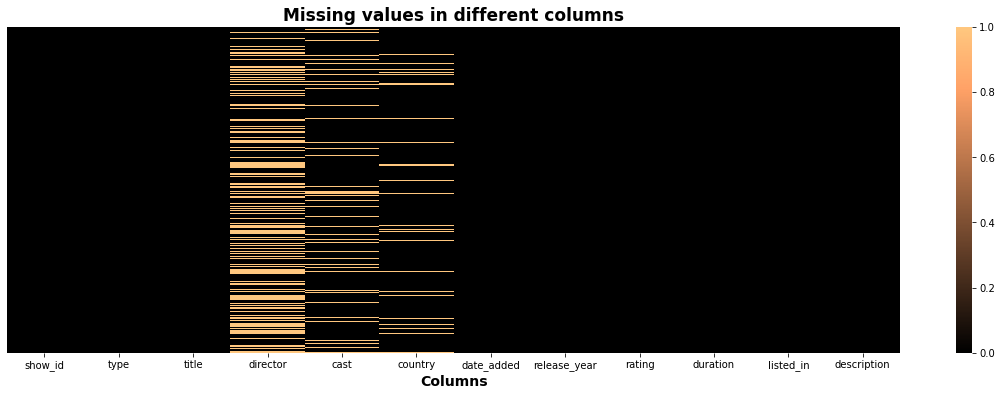

In [166]:
# Plot
# Setting figure size
plt.figure(figsize = (20,6))

# Heatmap
sns.heatmap(netflix_df.isnull(), cbar = True, yticklabels = False, cmap = 'copper')

# Settign x-label, title and fonts
plt.xlabel('Columns', size=14, fontweight="bold")
plt.title('Missing values in different columns', fontweight = "bold", size = 17)
plt.show()

In [167]:
# Null values in terms of percentage
netflix_df.isna().sum()/netflix_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

We have null values in the columns 'director', 'cast', 'country', 'date_added'cand 'rating'. We cannot simply drop these null values because it will result in a loss of information. Also, we cannot replace these values with appropriate measures of central tendency after looking at their distribution. A fine approach would be if we replace these values with 'Not available except for two columns, the first one is 'date_added' and 'rating' as they both have less than one percent colour missing values. So, we will drop null values in these two columns.

In [168]:
# Dropping null values 
netflix_df.dropna(subset = ['date_added', 'rating'], inplace = True)

In [169]:
# Checking for duplicates in the dataset
netflix_df.duplicated().sum()

0

In [170]:
# Replacing null values 
netflix_df.fillna('Not available', inplace = True)

We will change the datatype of 'date_added' column and add to more columns 'month_added' and 'year_added'.

In [171]:
# Changing the 'date_added' column data type from object to datetime datatype
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extracting day from the 'date_added' column and creating a new column in the dataset
netflix_df['day_added'] = netflix_df['date_added'].dt.day 

# Extracting month from the 'date_added' column and creating a new column in the dataset
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()

# Extracting year from the 'date_added' column and creating a new column in the dataset
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [172]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,October,2020
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,March,2019
7784,s7785,Movie,Zulu Man in Japan,Not available,Nasty C,Not available,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,September,2020
7785,s7786,TV Show,Zumbo's Just Desserts,Not available,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,31,October,2020
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Not available,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,March,2020


We will create the subsets of only movies and only TV shows using the column 'type' in the dataset

In [173]:
# Creating subsets for tv shows and movies.
only_tv_shows = netflix_df[netflix_df['type'] == 'TV Show']

only_movies = netflix_df[netflix_df['type'] == 'Movie']

###Handling Comma De-limiter Values

In [174]:
comma_columns = ['cast','director','country','listed_in']

for column in comma_columns:
    if len(netflix_df[netflix_df[column].str.startswith(",")]) > 0:
        print("In column:",column,"there are bad entries that BEGIN with a comma")
    if len(netflix_df[netflix_df[column].str.endswith(",")]) > 0:
        print("In column:",column,"there are bad entries that END with a comma")
    if len(netflix_df[netflix_df[column] == '']) > 0:
        print("In column:",column,"there are bad entries that CONTAIN empty values ''")
     


In column: country there are bad entries that END with a comma


In [175]:
netflix_df[netflix_df['country'].str.startswith(",")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added


In [176]:
netflix_df[netflix_df['country'].str.endswith(",")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
1402,s1403,Movie,City of Joy,Madeleine Gavin,Not available,"United States,",2018-09-07,2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...,7,September,2018
2315,s2316,Movie,Funan,Denis Do,"BÃ©rÃ©nice Bejo, Louis Garrel, Colette Kieffer...","France, Belgium, Luxembourg, Cambodia,",2020-07-18,2018,TV-14,87 min,"Dramas, International Movies",Separated from their young son during the brut...,18,July,2020
2827,s2828,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,",2019-10-01,1975,TV-MA,96 min,"Classic Movies, Dramas, International Movies",A motivated teen strives to rise from dishwash...,1,October,2019
7433,s7434,Movie,Virunga,Orlando von Einsiedel,Not available,"United Kingdom,",2014-11-07,2014,TV-MA,100 min,"Documentaries, International Movies",The Oscar-nominated true story of the rangers ...,7,November,2014


In [177]:
netflix_df.loc[1402,'country'] = 'United States'
netflix_df.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
netflix_df.loc[2827,'country'] = 'Poland'
netflix_df.loc[7433,'country'] = 'United Kingdom'

In [178]:
netflix_df[netflix_df['listed_in'] == '']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added


##EDA

###Type of Content : TV Shows and Movies

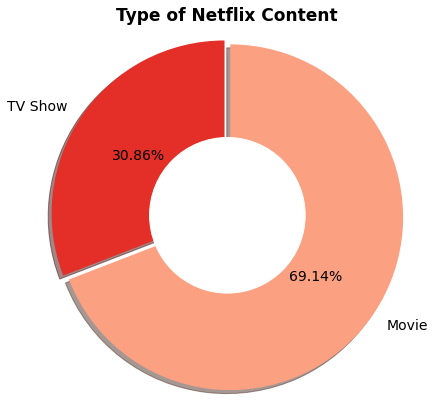

In [179]:
# Create a piechart
plt.figure(figsize=(7, 7))
clr = sns.color_palette('Reds_r',2)

labels=['TV Show', 'Movie']

plt.pie(netflix_df['type'].value_counts().sort_values(), labels=labels, explode=[0.02,0.02],
        autopct='%1.2f%%', colors = clr, textprops={'fontsize': 14}, startangle=90, shadow = True)

circle = plt.Circle( (0,0), 0.45, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Setting title
plt.title('Type of Netflix Content', fontweight = 'bold', fontsize = 17)
plt.axis('equal')
plt.show()



Clearly number of Movies on Netflix outnumbered the number of TV Shows. Almost 70% content are movies while rest 30% are TV Shows.

In [180]:
def countplot_v(x_value, order, plot_x_label, plot_title):
  '''
  This function will display a count plot which takes values as --> x-axis, Order, x-label and bold title
  Prints a verticle columns count plot which takes X-axis value, Order, X_label and title of plot
  
  '''
  # Setting grid and figure size
  plt.figure(figsize=(15,6))
  plt.grid(b=False,axis='both')

  # Count plot
  ax = sns.countplot(x = x_value, data = netflix_df, order = order.value_counts().index[:10],
              palette = 'flare_r')

  # Loop to annote the values on plot
  for j in ax.patches:
    ax.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=12,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel = plot_x_label, ylabel = "")
  plt.title(plot_title)


  plt.show()

#### Movies / TV shows added per year on Netflix




Now storing the value counts of the movies and tv shows in different variables according to year they were added in Netflix database

In [181]:
# Movie counts by year
mov_count = only_movies.year_added.value_counts()

# TV show count by year
show_count = only_tv_shows.year_added.value_counts()

Text(0.5, 1.0, 'Movies/TV Shows Released per Year')

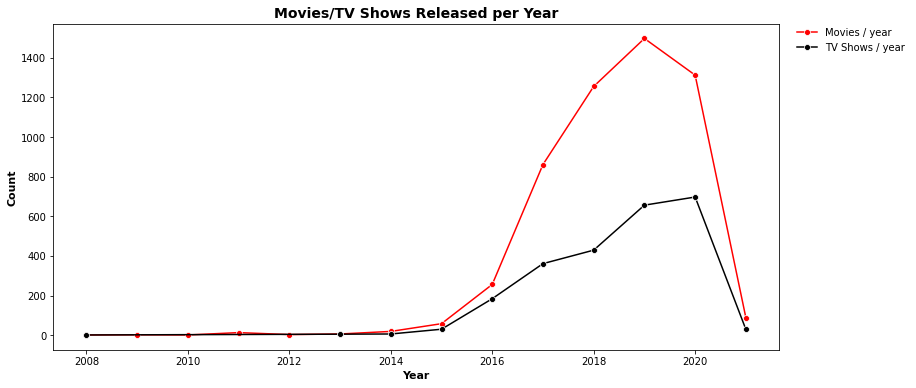

In [182]:
# Line plot
plt.figure(figsize=(13,6))

sns.lineplot(data= mov_count, color="red",  label = "Movies / year",marker='o')
sns.lineplot(data= show_count, color="black",  label = "TV Shows / year",marker='o')

# Draw grid lines with red color and dashed style
plt.grid(color='white', linewidth=0.6)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)


plt.xlabel('Year', fontweight = 'bold', fontsize = 11)
plt.ylabel('Count', fontweight = 'bold', fontsize = 11)
plt.title('Movies/TV Shows Released per Year', fontweight = 'bold', fontsize = 14)

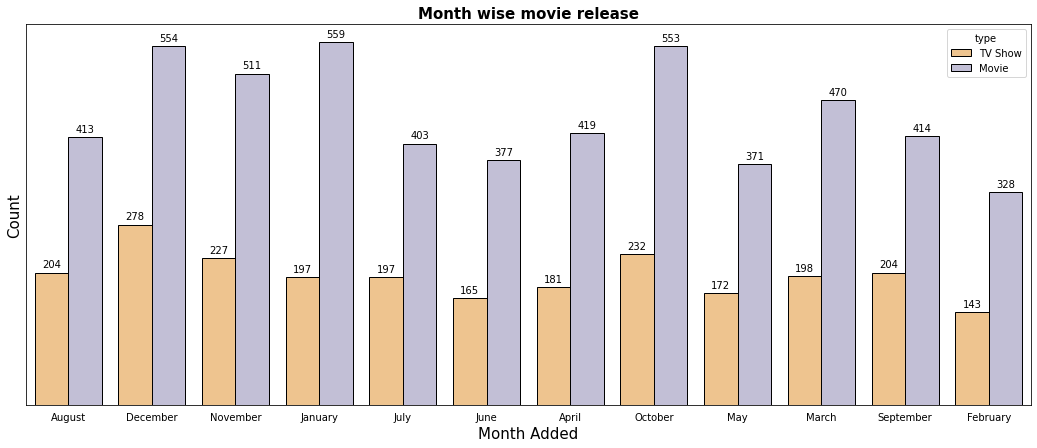

In [183]:
# Release of movies month-wise
plt.figure(figsize = (18,7))
ax1 = sns.countplot(x = 'month_added', data = netflix_df, hue = 'type', palette = 'PuOr', ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for j in ax1.patches:
    ax1.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')

plt.title('Month wise movie release',fontsize = 15, fontweight = 'bold')  
plt.xlabel('Month Added', fontsize = 15) 
plt.ylabel('Count', fontsize = 15)    
plt.show()

In [184]:
# Creating a dataframe to store day values counts.
days_df = pd.DataFrame(netflix_df.day_added.value_counts().reset_index())
days_df.rename(columns={'index':'Day', 'day_added':'Count'}, inplace=True)

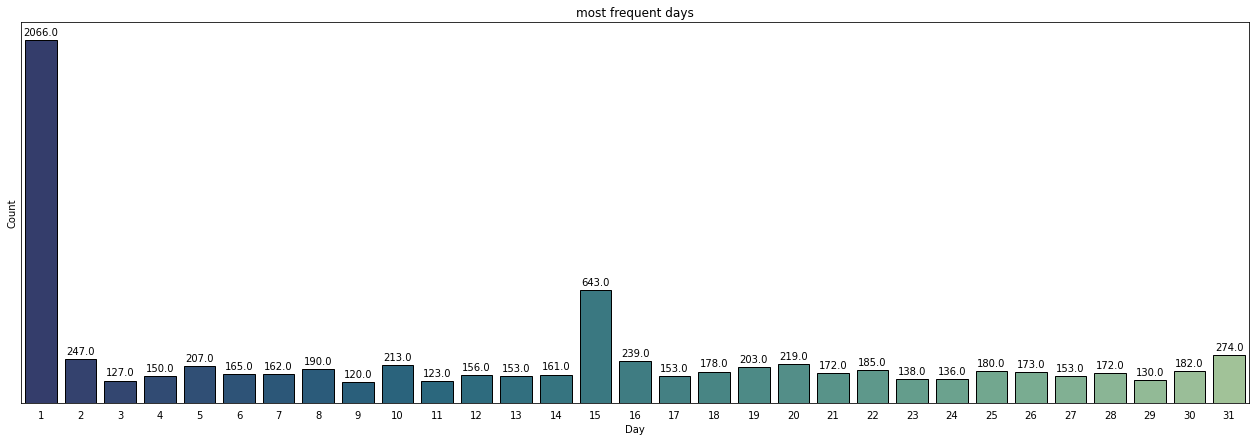

In [185]:
plt.figure(figsize=(22,7))
plt.title('most frequent days')
ax2 = sns.barplot(data = days_df, x='Day', y = 'Count', palette="crest_r", ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for j in ax2.patches:
    ax2.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')


###Top 10 countries with most content

In [186]:
netflix_df['country'].value_counts()[:15].reset_index()

,index,country
0,United States,2547
1,India,923
2,Not available,505
3,United Kingdom,397
4,Japan,224
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


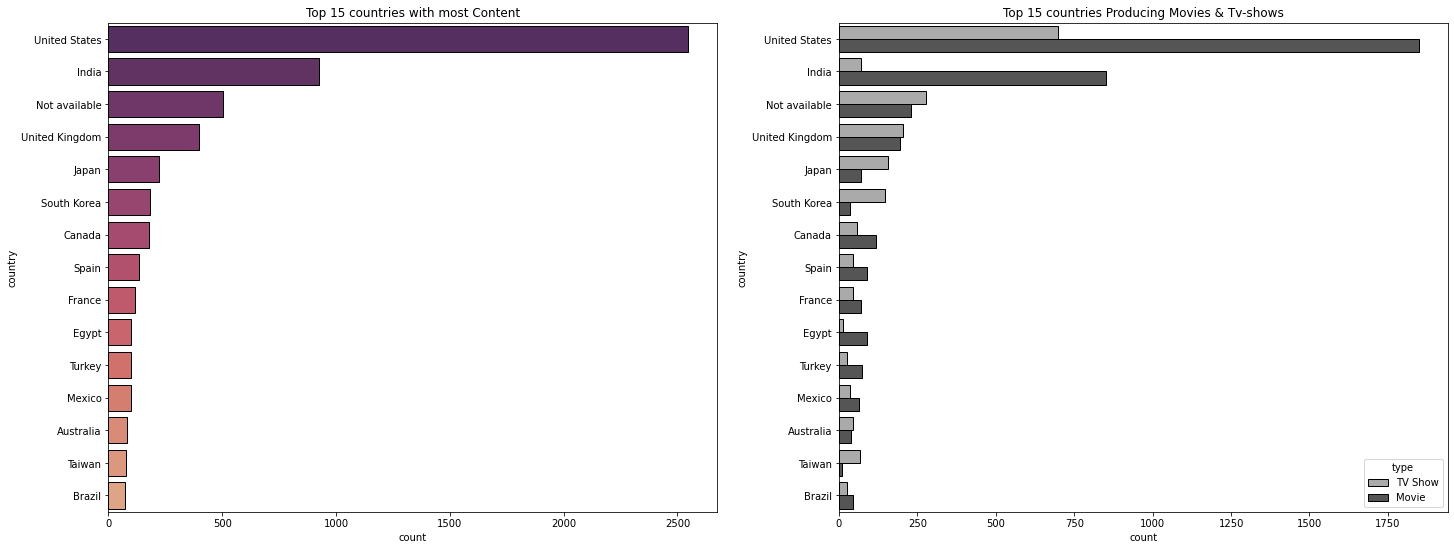

In [187]:
#Figuring some graph
fig, ax = plt.subplots(1,2,figsize=(24,9))

# 
order_2 = netflix_df['country'].value_counts().index[:15]

#Analysing top 10 countries with most content 
sns.countplot(data=netflix_df,y='country',ax = ax[0],order = order_2, palette = 'flare_r', ec='black').set(title = 'Top 15 countries with most Content')

#This graph represent the Top 10 countries contents with Movies and tv-shows
sns.countplot(data=netflix_df, y ='country',ax = ax[1],order = order_2, hue='type', palette = 'gray_r', ec='black').set(title ='Top 15 countries Producing Movies & Tv-shows')
plt.show()


###Genres

In [188]:
genre_mov = only_movies['listed_in'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

In [189]:
genre_show = only_tv_shows['listed_in'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

Text(0.5, 1.0, 'Top 20 movie genres')

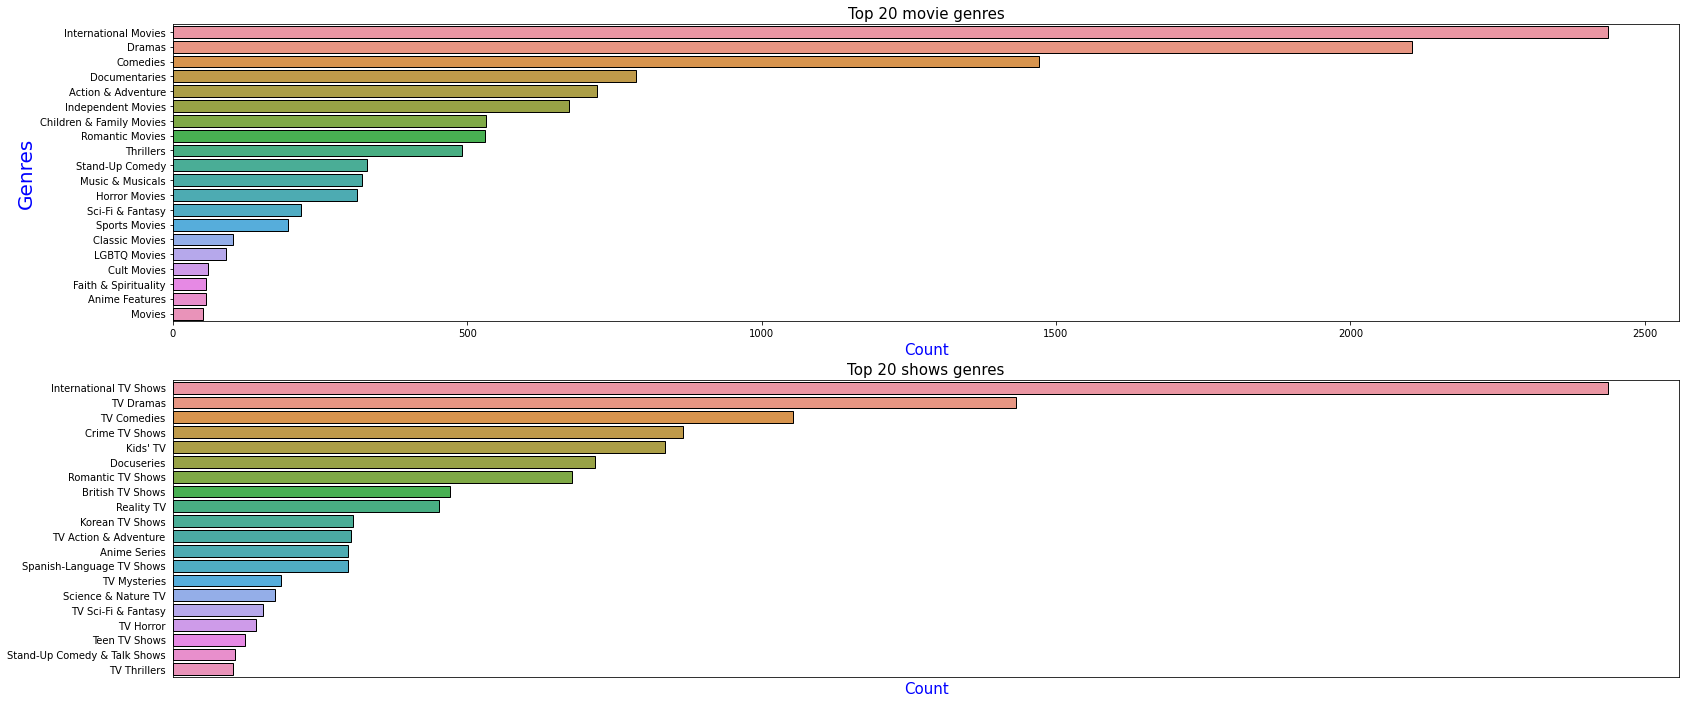

In [190]:
fig, ax4 = plt.subplots(2,1, figsize = (27,12))

od1 = genre_mov.value_counts().index[:20]
od2 = genre_show.value_counts().index[:20]

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

sns.countplot(y = genre_show, order = od2, ax = ax4[1], ec='black')
sns.countplot(y = genre_mov, order = od1, ax = ax4[0], ec='black')

ax4[0].set_xlabel('Count', fontsize = 15, c='b')
ax4[1].set_xlabel('Count', fontsize = 15, c='b')
ax4[0].set_ylabel('Genres', fontsize = 20, c = 'b')


ax4[1].set_title('Top 20 shows genres', fontsize = 15)
ax4[0].set_title('Top 20 movie genres', fontsize = 15 )

In [191]:
netflix_df.head().T

,0,1,2,3,4
show_id,s1,s2,s3,s4,s5
type,TV Show,Movie,Movie,Movie,Movie
title,3%,7:19,23:59,9,21
director,Not available,Jorge Michel Grau,Gilbert Chan,Shane Acker,Robert Luketic
cast,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...","DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...","Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","Elijah Wood, John C. Reilly, Jennifer Connelly...","Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."
country,Brazil,Mexico,Singapore,United States,United States
date_added,2020-08-14 00:00:00,2016-12-23 00:00:00,2018-12-20 00:00:00,2017-11-16 00:00:00,2020-01-01 00:00:00
release_year,2020,2016,2011,2009,2008
rating,TV-MA,TV-MA,R,PG-13,PG-13
duration,4 Seasons,93 min,78 min,80 min,123 min


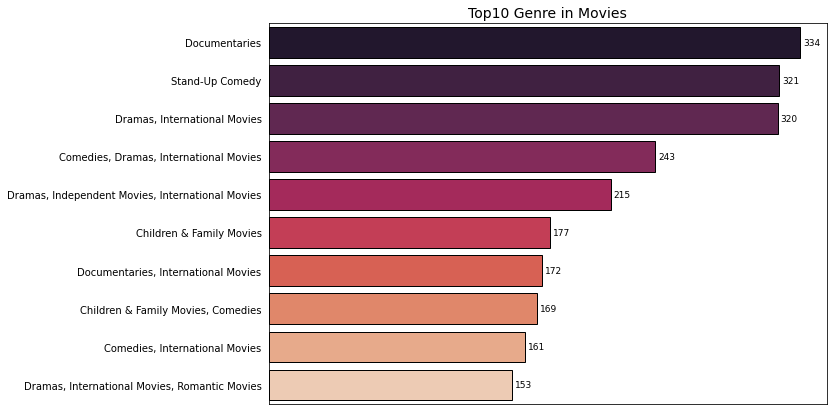

In [192]:
# Top 10 Genre in movies
plt.figure(figsize=(10,7))
ax = sns.barplot(y = only_movies["listed_in"].value_counts().head(10).index,
            x = only_movies["listed_in"].value_counts().head(10).values,palette="rocket", ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(20, -18),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

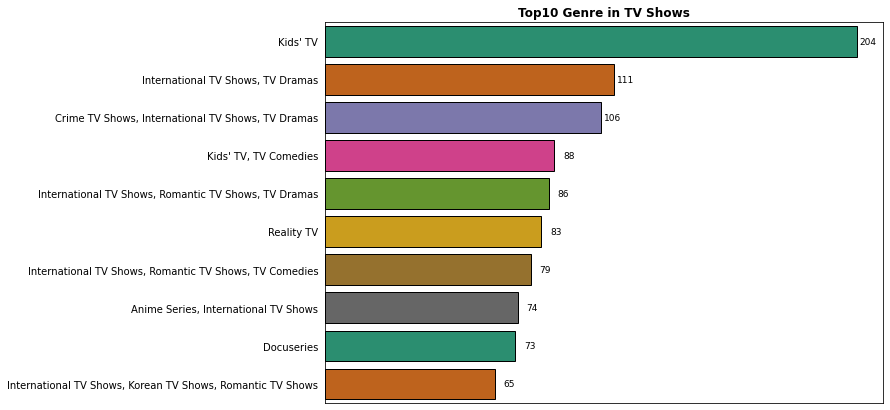

In [193]:
#Top10 Genre in TV Shows
plt.figure(figsize=(10,7))
ax = sns.barplot(y = only_tv_shows["listed_in"].value_counts().head(10).index,
            x = only_tv_shows["listed_in"].value_counts().head(10).values,palette="Dark2", ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(20, -18),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()
     


###Ratings


In [194]:
print('TV Shows Ratings:',netflix_df[netflix_df['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',netflix_df[netflix_df['type'] == 'Movie']['rating'].unique())

TV Shows Ratings: ['TV-MA' 'TV-14' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'NR' 'R' 'TV-Y7-FV'] 

Movies Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'PG' 'G' 'TV-Y7'
 'NC-17' 'TV-Y7-FV' 'UR']


**RATING AND THEIR MEANINGS**
TV-MA: Mature Audience Only

R: Restricted

PG-13: Parents Strongly Cautioned

TV-14: Parents Strongly Cautioned

TV-PG: Parental Guidance Suggested

NR :Not Rated

TV-G: General Audience

TV-Y: Programs aimed at a very young audience

TV-Y7: Directed to Older Children

PG: Parental Guidance Suggested

G: General Audiences

NC-17: Clearly Adult

TV-Y7 FV: Directed to Older Children - Fantasy Violence

UR: Unrated

In [195]:
#  Creating new column where we are giving appropriate names according to the suitable age to each official ratings
rating_type = {
    'TV-PG': 'Pre-Teens',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Pre-Teens',
    'TV-Y7': 'Pre-Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Pre-Teens',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
# adding a new column in the dataset which is replacing the original rating values with age_rating_names
netflix_df['rating_group'] = netflix_df['rating'].replace(rating_type)

#checking the unique values of age_rating attribute
netflix_df['rating_group'].unique()

array(['Adults', 'Teens', 'Pre-Teens', 'Kids'], dtype=object)

In [196]:
netflix_df['rating_group'].value_counts()/netflix_df['rating_group'].value_counts().sum()*100

Adults       46.550837
Teens        29.781210
Pre-Teens    17.078507
Kids          6.589447
Name: rating_group, dtype: float64

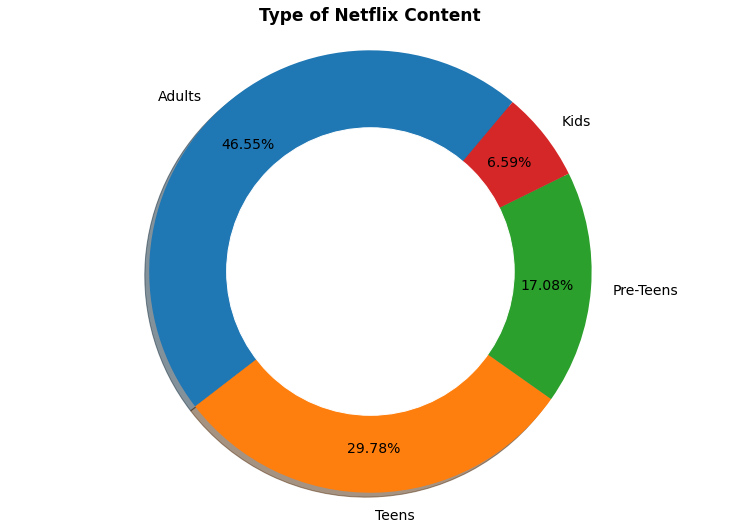

In [197]:
# Create a piechart
plt.figure(figsize=(13, 9))
clr = sns.color_palette('tab10',4)

labels=['Adults', 'Teens', 'Pre-Teens', 'Kids']

plt.pie(netflix_df['rating_group'].value_counts(), labels = labels,
        autopct='%1.2f%%', colors = clr, textprops={'fontsize': 14}, startangle = 50, pctdistance = .8, shadow = True)

circle = plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

# Setting title
plt.title('Type of Netflix Content', fontweight = 'bold', fontsize = 17)
plt.axis('equal')
plt.show()

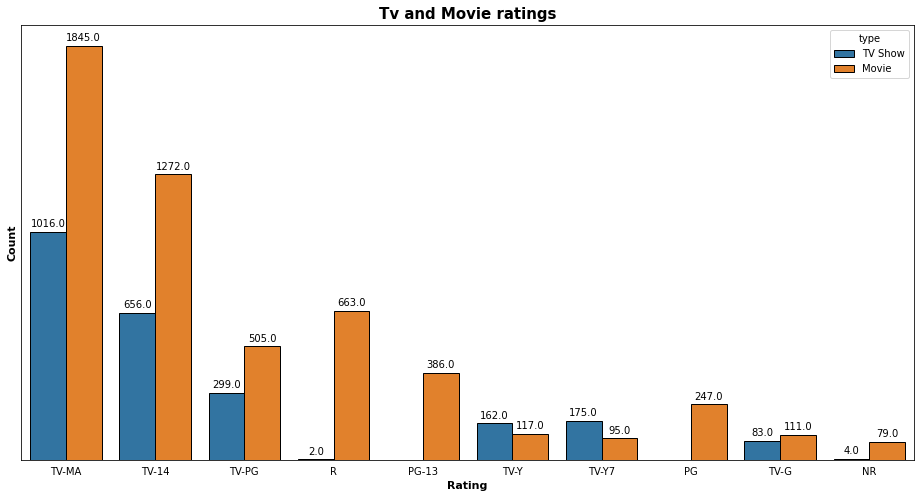

In [198]:
plt.figure(figsize = (16,8))
plt.grid(b=False,axis='both')

ax = sns.countplot(x = 'rating', data = netflix_df, order = netflix_df.rating.value_counts().index[:10], hue = 'type', ec='black' )

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for j in ax.patches:
    ax.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')


# Setting labels, title and fonts
plt.title('Tv and Movie ratings', fontweight = 'bold', fontsize = 15)
plt.xlabel('Rating', fontweight = 'bold', fontsize = 11)
plt.ylabel('Count', fontweight = 'bold', fontsize = 11)
plt.show()

###Top actors in Movies and TV shows

First we will select and store only valid names from 'cast' column of the dataset and we will also set 'title' column as index.

In [199]:
# Storing valid names and setting title
actor_movies = only_movies[only_movies.cast != 'Not available'].set_index('title')

Next we will split the 'cast' on comma (', ') because there are movies where more than one actors are present. Also, expanding the data frame so that every cast has a different column based on title.

In [200]:
actor_movies = actor_movies.cast.str.split(', ', expand= True)

In [201]:
actor_movies.head(2)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
title,,,,,,,,,,,,,,,,,,,,,
7:19,DemiÃ¡n Bichir,HÃ©ctor Bonilla,Oscar Serrano,Azalia Ortiz,Octavio Michel,Carmen Beato,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23:59,Tedd Chan,Stella Chung,Henley Hii,Lawrence Koh,Tommy Kuan,Josh Lai,Mark Lee,Susan Leong,Benjamin Lim,None,...,None,None,None,None,None,None,None,None,None,None


In [202]:
actor_movies = actor_movies.stack().reset_index(level = 1, drop = True)

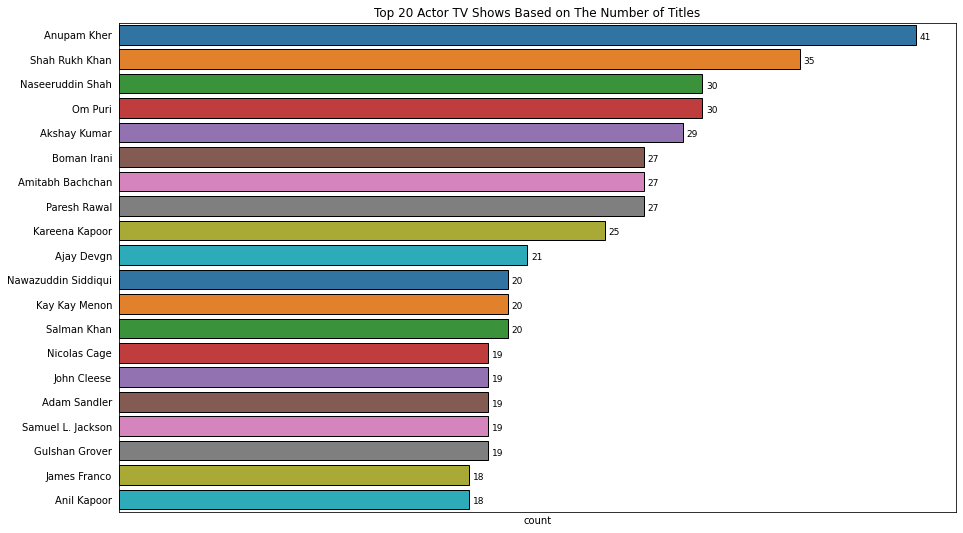

In [203]:
plt.figure(figsize=(15,9))
plt.title('Top 20 Actor TV Shows Based on The Number of Titles')
ax = sns.countplot(y = actor_movies, order=actor_movies.value_counts().index[:20], palette='tab10', ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(15, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.show()


We will go through with the same process for TV shows

In [204]:
actor_tvshow = only_tv_shows[only_tv_shows.cast != 'Not available'].set_index('title')

In [205]:
actor_tvshow = actor_tvshow.cast.str.split(', ', expand= True)

In [206]:
actor_tvshow = actor_tvshow.stack().reset_index(level = 1, drop = True)

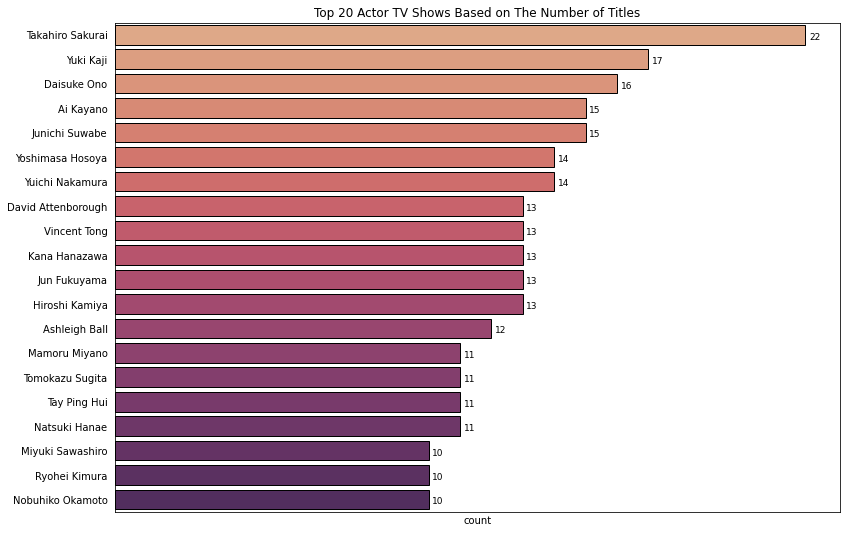

In [207]:
plt.figure(figsize=(13,9))
plt.title('Top 20 Actor TV Shows Based on The Number of Titles')
ax = sns.countplot(y = actor_tvshow, order=actor_tvshow.value_counts().index[:20], palette='flare', ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(15, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.show()

In [208]:
only_tv_shows.director.value_counts().sort_values()

Kiko Cruz Claverol, Patricia Font       1
Dawn Porter                             1
Everardo Gout                           1
Peter Ho                                1
Diego Enrique Osorno                    1
                                     ... 
Rob Seidenglanz                         2
Iginio Straffi                          2
Shin Won-ho                             2
Alastair Fothergill                     3
Not available                        2214
Name: director, Length: 178, dtype: int64

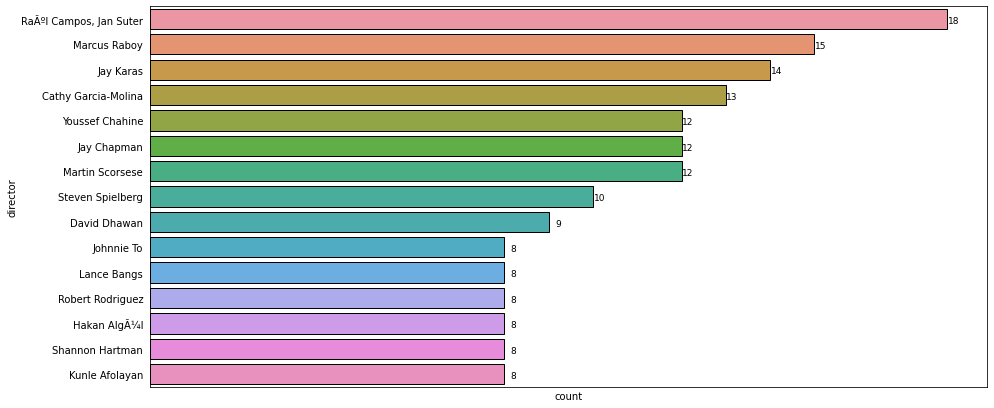

In [209]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = only_movies, y = 'director', order = only_movies.director.value_counts().index[1:16], ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(12, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.show()

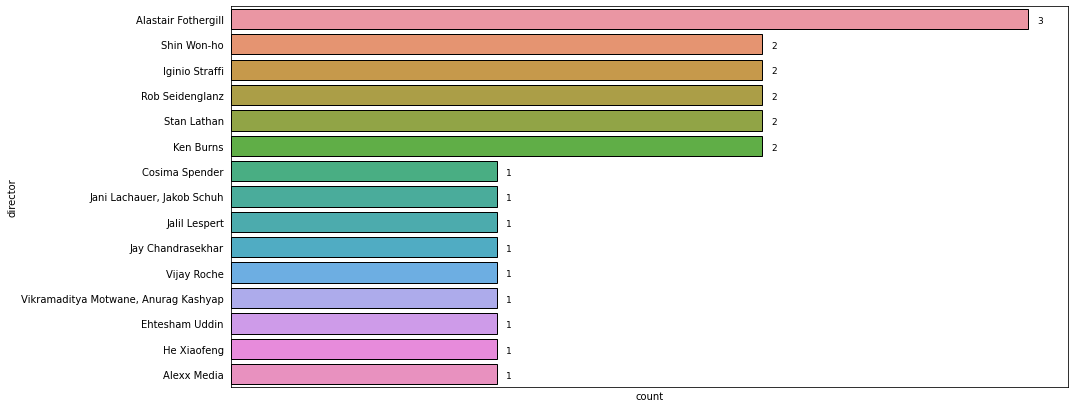

In [210]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = only_tv_shows, y = 'director', order = only_tv_shows.director.value_counts().index[1:16], ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)

for p in ax.patches:
    ax.annotate(int(p.get_width()), 
                ((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(15, -14),
                fontsize=9,
                color='black',
                textcoords='offset points', 
                horizontalalignment='right')

plt.show()

###Duration

In [211]:
movie_duration = netflix_df.loc[netflix_df['type'] == 'Movie',['type','duration']]  

In [212]:
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0]))

Text(0.5, 1.0, 'Movie Duration')

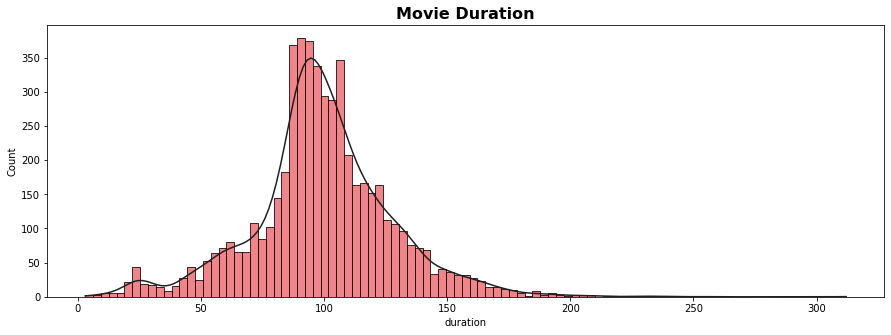

In [213]:
#  movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration', data = movie_duration, kde=True, color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")

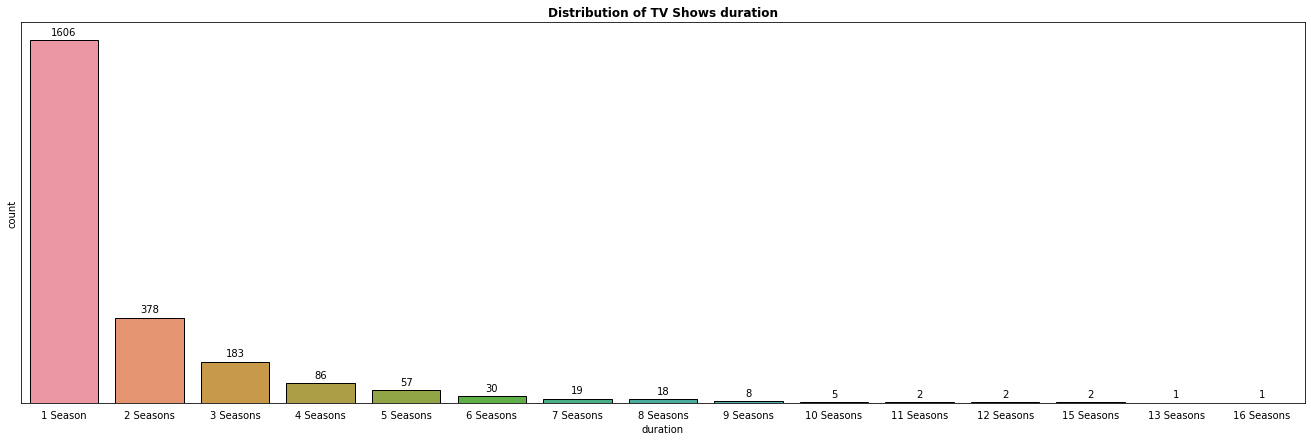

In [214]:

#Checking the distribution of TV SHOWS
plt.figure(figsize=(23,7))
plt.title("Distribution of TV Shows duration",fontweight='bold')
ax3 = sns.countplot(x=only_tv_shows['duration'],data=only_tv_shows,order = only_tv_shows['duration'].value_counts().index, ec='black')

plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for j in ax3.patches:
    ax3.annotate(format(j.get_height()),
                     (j.get_x() + j.get_width() / 2,
                      j.get_height()), ha='center', va='center',
                     size=10,color='black', 
                     xytext=(0, 8),
                     textcoords='offset points')

In [215]:
netflix_df['count'] = 1
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:11]
data = data['country']

In [216]:
df_heatmap = netflix_df[netflix_df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating_group'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,Not available,South Korea,Spain,United Kingdom,United States
rating_group,,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.318812,0.469945,0.835821,0.513854,0.502552
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.170297,0.027322,0.022388,0.093199,0.073420
Pre-Teens,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.235644,0.120219,0.044776,0.204030,0.187279
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.275248,0.382514,0.097015,0.188917,0.236749


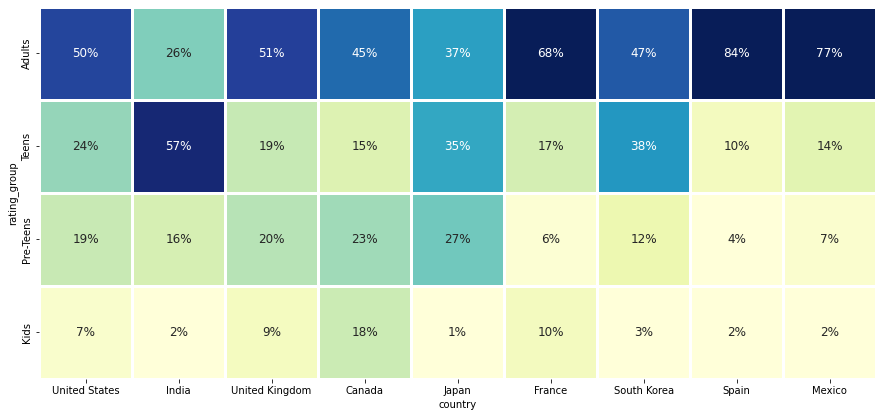

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Pre-Teens', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##Mast kaam

In [227]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

In [218]:
# Replacing the values where the director is null with appropriate strings
df["director"] = df["director"].fillna("")
df["cast"] = df["cast"].fillna("")
df["country"] = df["country"].fillna("United States")

#nf["date_added"] = nf["date_added"].fillna("")
df["rating"] = df["rating"].fillna("")
     


In [219]:

#Taking the primary country into account for each record and not the others
df.country = df.country.str.split(',')     
df.loc[:, 'country'] = df.country.map(lambda x: x[0])


In [220]:
df.director = df.director.str.split(',')
df.loc[:, 'director'] = df.director.map(lambda x: x[0])

In [221]:
df.cast = df.director.str.split(',')
df.loc[:, 'cast'] = df.cast.map(lambda x: x[0])

In [222]:
df['all_text_features'] = df['listed_in'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " " + df['country'].astype(str) + " " +df['cast'].astype(str) + " " + df['rating'].astype(str)

In [223]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [224]:
def remove_punc(text):
  '''
  this function returns the text after removing the punctuations
  ''' 
  translator = str.maketrans('','', string.punctuation)

  return text.translate(translator)

In [225]:
df['description'] = df['description'].apply(remove_punc)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,all_text_features
0,s1,TV Show,3%,,,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Dramas, International Movies After a devastati..."
2,s3,Movie,23:59,Gilbert Chan,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,"Horror Movies, International Movies When an ar..."
3,s4,Movie,9,Shane Acker,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,Dramas A brilliant group of students become ca...


In [228]:
count_vect = CountVectorizer()